# Projet de Data Analyse : E-commerce féminin

**Objectif** : Analyser les données de comportement d'achat sur un site de vêtements pour femmes, identifier les produits populaires, le profil des clientes, la satisfaction, et formuler des recommandations pour le marketing.

**Source de données** : Kaggle - Women's E-Commerce Clothing Reviews

**Techniques utilisées** :
- Nettoyage et traitement de données
- Visualisation (matplotlib, seaborn)
- Statistiques descriptives
- Tests statistiques (corrélation, chi², ANOVA)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from warnings import filterwarnings
filterwarnings('ignore')

# Chargement des données
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

# Aperçu
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
# Afficher la liste des colonnes
print("Colonnes disponibles :")
print(df.columns)

# Supprimer la colonne 'Unnamed: 0' si elle existe
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])


Colonnes disponibles :
Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')


In [7]:
# Nombre de valeurs manquantes par colonne
df.isnull().sum()


Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [8]:
# Supprimer les lignes où l'avis (Review Text) est manquant
df = df.dropna(subset=['Review Text']).reset_index(drop=True)

# Vérifions combien de lignes il reste
df.shape


(22641, 10)

## Suppression des lignes sans avis client

On supprime ici les lignes qui n'ont pas de texte d'avis (`Review Text`) car elles ne permettent aucune analyse de sentiment ou de satisfaction.


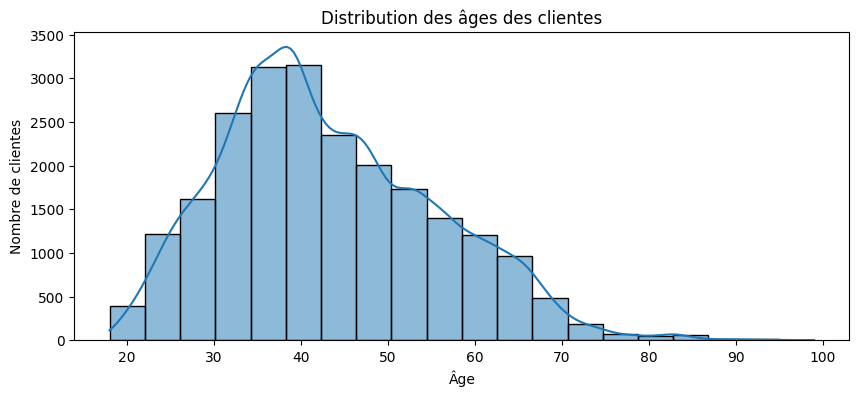

In [9]:
plt.figure(figsize=(10, 4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Distribution des âges des clientes")
plt.xlabel("Âge")
plt.ylabel("Nombre de clientes")
plt.show()


## Distribution des âges des clientes

Ce graphique montre l'âge des clientes qui ont laissé un avis. Cela permet de mieux cibler les segments marketing (jeunes femmes, seniors, etc.).


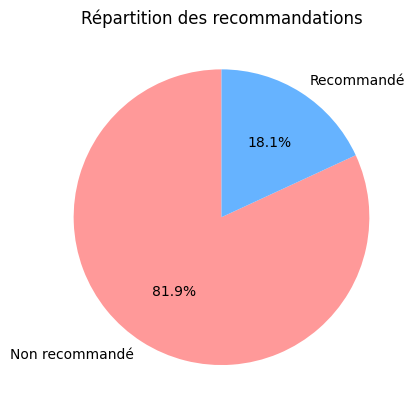

In [10]:
labels = ['Non recommandé', 'Recommandé']
df['Recommended IND'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=labels, colors=['#ff9999','#66b3ff'], startangle=90)
plt.title("Répartition des recommandations")
plt.ylabel("")
plt.show()


## Proportion de recommandations

Ce graphique circulaire montre combien de clientes recommandent les produits, ce qui permet de mesurer la satisfaction globale.


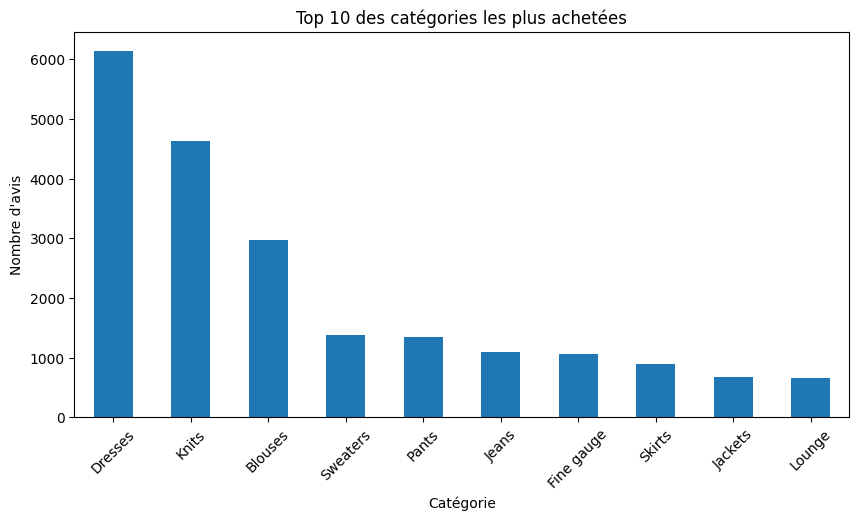

In [11]:
plt.figure(figsize=(10, 5))
df['Class Name'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 des catégories les plus achetées")
plt.xlabel("Catégorie")
plt.ylabel("Nombre d'avis")
plt.xticks(rotation=45)
plt.show()


## Catégories les plus achetées

Ce graphique présente les 10 catégories de vêtements ayant reçu le plus d'avis clients. Cela reflète les produits les plus populaires ou les plus vendus.


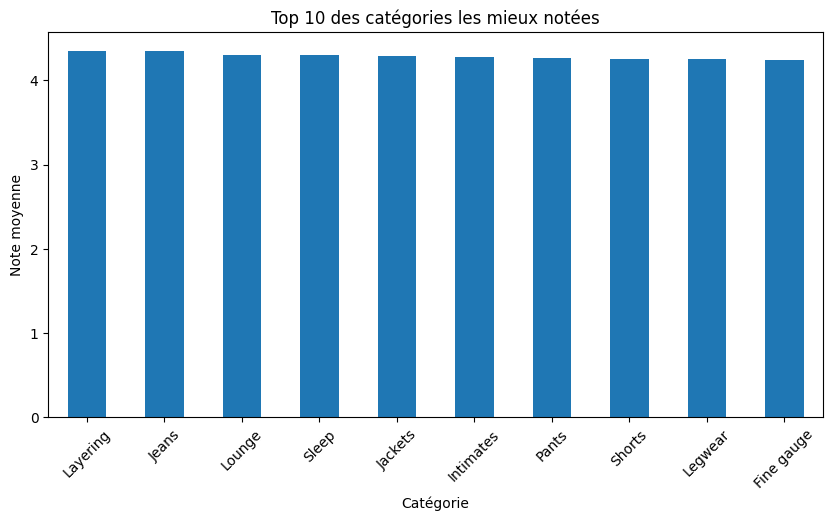

In [12]:
plt.figure(figsize=(10, 5))
df.groupby('Class Name')['Rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 des catégories les mieux notées")
plt.xlabel("Catégorie")
plt.ylabel("Note moyenne")
plt.xticks(rotation=45)
plt.show()


In [ ]:
## Catégories les mieux notées

On identifie ici les catégories de vêtements ayant obtenu les meilleures notes moyennes sur 5. Cela permet de valoriser les produits de qualité.


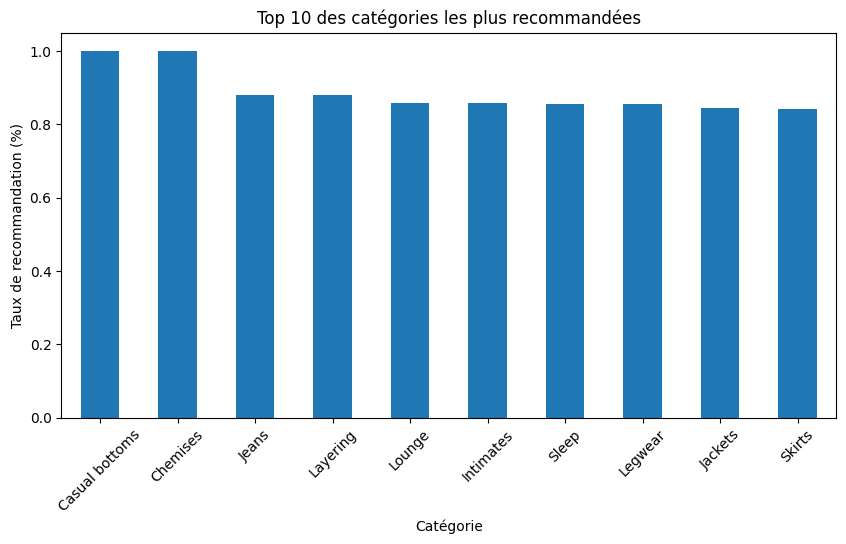

In [13]:
recommended_ratio = df.groupby('Class Name')['Recommended IND'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
recommended_ratio.plot(kind='bar')
plt.title("Top 10 des catégories les plus recommandées")
plt.xlabel("Catégorie")
plt.ylabel("Taux de recommandation (%)")
plt.xticks(rotation=45)
plt.show()


In [ ]:
## Taux de recommandation par catégorie

Ce graphique montre le pourcentage moyen de recommandation par catégorie. Cela permet de repérer les vêtements que les clientes conseillent le plus.


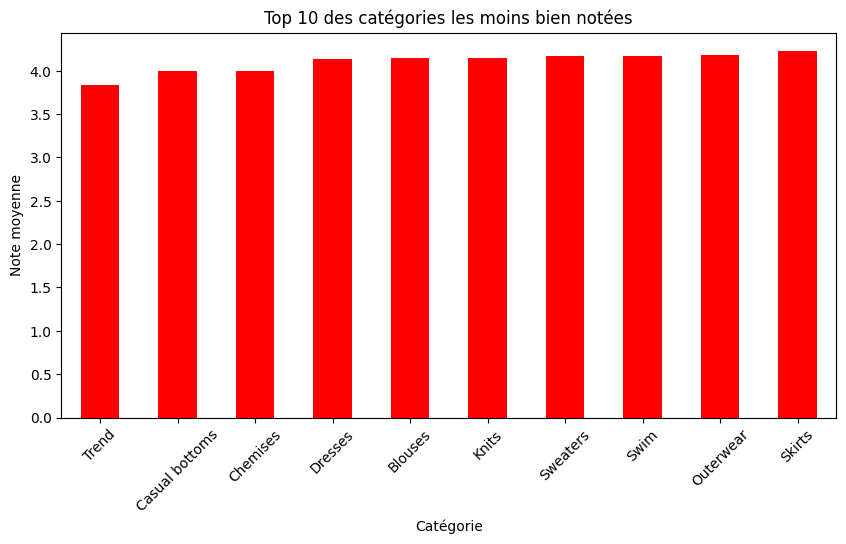

In [14]:
plt.figure(figsize=(10, 5))
df.groupby('Class Name')['Rating'].mean().sort_values().head(10).plot(kind='bar', color='red')
plt.title("Top 10 des catégories les moins bien notées")
plt.xlabel("Catégorie")
plt.ylabel("Note moyenne")
plt.xticks(rotation=45)
plt.show()


## Estimation du chiffre d'affaires

Nous simulons ici un prix moyen par catégorie de vêtements afin d’estimer le chiffre d’affaires global et par segment. Cela permettra d’identifier les catégories les plus rentables.


In [16]:
# Dictionnaire de prix moyens par catégorie
price_map = {
    'Dresses': 59.99,
    'Tops': 39.99,
    'Jackets': 89.99,
    'Bottoms': 49.99,
    'Intimates': 29.99,
    'Sweaters': 69.99,
    'Outerwear': 99.99,
    'Trend': 79.99,
    'Blouses': 44.99
}

# Appliquer ces prix à la colonne "Class Name"
df['Price'] = df['Class Name'].map(price_map)

# Remplacer les prix manquants par un prix par défaut
df['Price'].fillna(49.99, inplace=True)


In [17]:
ca_total = df['Price'].sum()
print("Chiffre d'affaires estimé total : ", round(ca_total, 2), "€")


Chiffre d'affaires estimé total :  1249828.59 €


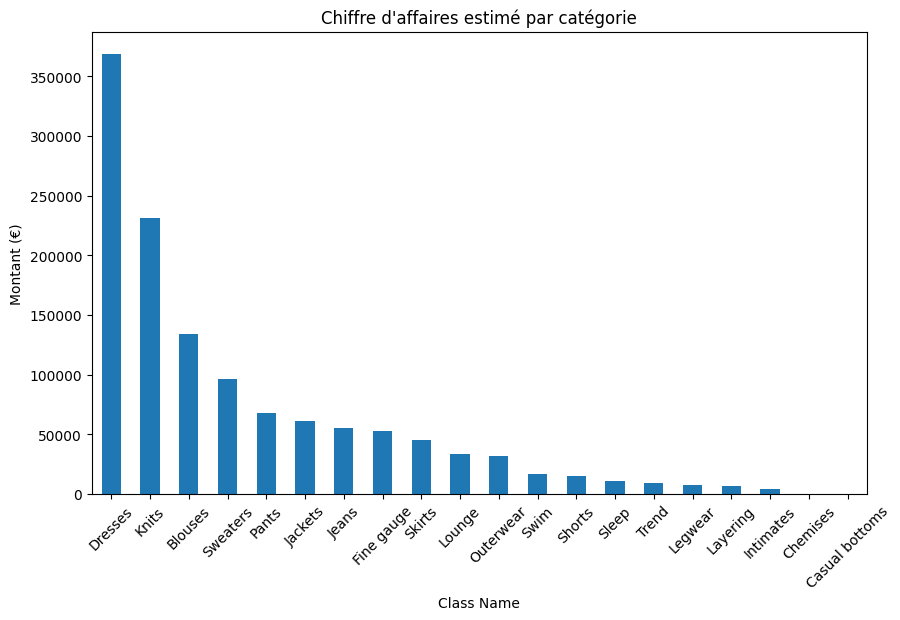

In [18]:
ca_par_cat = df.groupby('Class Name')['Price'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ca_par_cat.plot(kind='bar')
plt.title("Chiffre d'affaires estimé par catégorie")
plt.ylabel("Montant (€)")
plt.xticks(rotation=45)
plt.show()


## Commentaires les plus utiles

Nous identifions ici les commentaires les plus appréciés par les autres clientes, grâce au nombre de feedbacks positifs.


In [19]:
df.sort_values('Positive Feedback Count', ascending=False)[['Review Text', 'Positive Feedback Count']].head(5)


,Review Text,Positive Feedback Count
6971,I loved the lace detailing all over this dress...,122
1248,I've been on the hunt for the perfect dress to...,117
7493,"I generally don't write bad reviews, but there...",108
18411,I am a big fan of trench coats and i love that...,99
12737,This is my favorite dress i've bought in the p...,98


## Analyse de sentiment des avis clients

Cette analyse utilise TextBlob pour extraire la polarité (positif, neutre, négatif) de chaque commentaire écrit par les clientes.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 6.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 9.2 MB/s eta 0:00:00


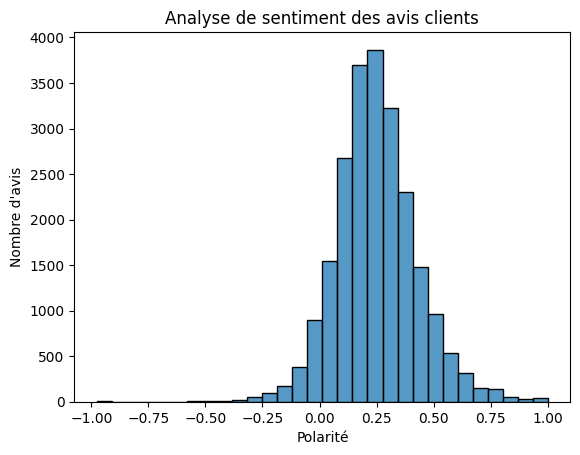

In [20]:
!pip install textblob
from textblob import TextBlob

df['sentiment'] = df['Review Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

sns.histplot(df['sentiment'], bins=30)
plt.title("Analyse de sentiment des avis clients")
plt.xlabel("Polarité")
plt.ylabel("Nombre d'avis")
plt.show()


In [ ]:
## Courbe de Lorenz : concentration du chiffre d'affaires

La courbe de Lorenz permet de visualiser si un petit groupe de clientes génère la majorité des ventes. Cela est utile pour identifier les clientes fidèles ou stratégiques.


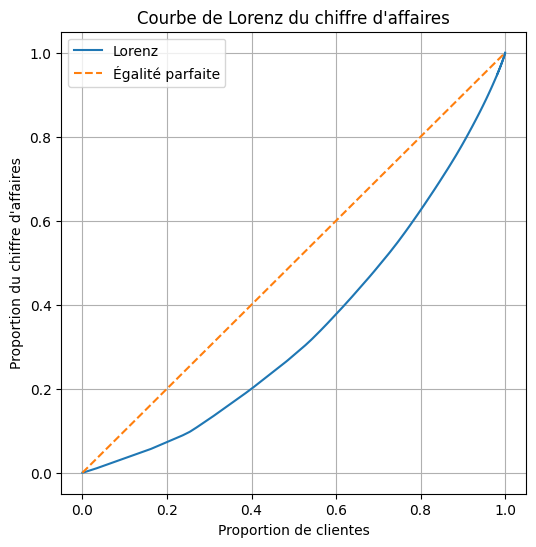

In [21]:
# Simuler un identifiant client (avec le texte de l'avis)
df['client_id'] = df['Review Text'].apply(lambda x: hash(x) % 10000)

# Calculer CA par cliente
ca_client = df.groupby('client_id')['Price'].sum().sort_values()
cumul = np.cumsum(ca_client) / ca_client.sum()
cumul = np.insert(cumul.values, 0, 0)

# Tracer la courbe de Lorenz
plt.figure(figsize=(6,6))
plt.plot(np.linspace(0,1,len(cumul)), cumul, drawstyle='steps-post', label="Lorenz")
plt.plot([0,1],[0,1], linestyle='--', label="Égalité parfaite")
plt.title("Courbe de Lorenz du chiffre d'affaires")
plt.xlabel("Proportion de clientes")
plt.ylabel("Proportion du chiffre d'affaires")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
## Conclusion : Concentration du chiffre d'affaires

L'analyse de la courbe de Lorenz montre une forte concentration du chiffre d'affaires : une petite proportion de clientes génère la majorité des ventes. Cette situation indique un potentiel pour des actions marketing ciblées (fidélisation des meilleures clientes, relance des moins actives).
